# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [4]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [8]:
# loading the data: Wholesale customers data
file_path = r"C:\Users\jessi\OneDrive\Área de Trabalho\DATA SCIENCE\LAB\lab-unsupervised-learning-es\data\Wholesale customers data.csv"
data = pd.read_csv(file_path)

print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


    #### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

    Lista de comprobación:

    * ¿Qué significa cada columna?
    * ¿Hay datos categóricos que convertir?
    * ¿Hay que eliminar datos que faltan?
    * Colinealidad de columnas: ¿hay correlaciones altas?
    * Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
    * Distribución de los datos por columnas: ¿está sesgada la distribución?
    * Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.9 KB
Channel             category
Region              category
Fresh                  int64
Milk                   int64
Grocery                int64
Frozen                 int64
Detergents_Paper       int64
Delicassen             int64
dtype: object


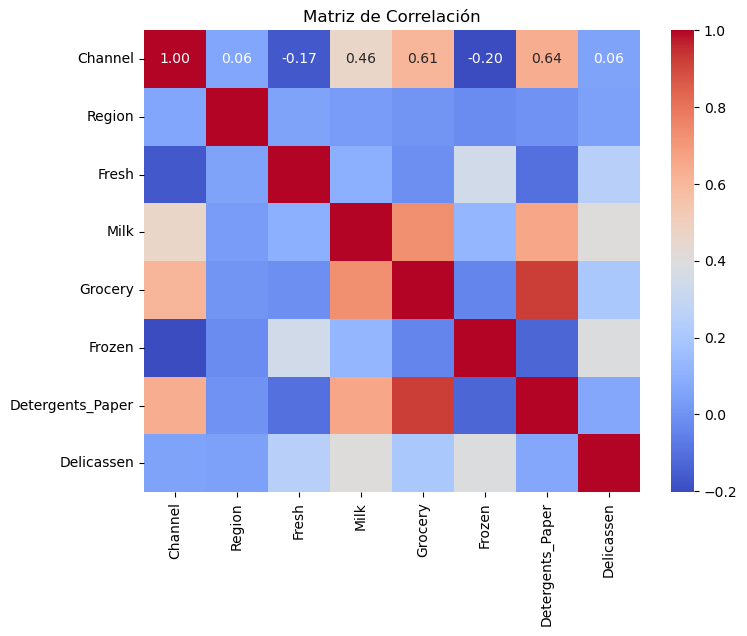

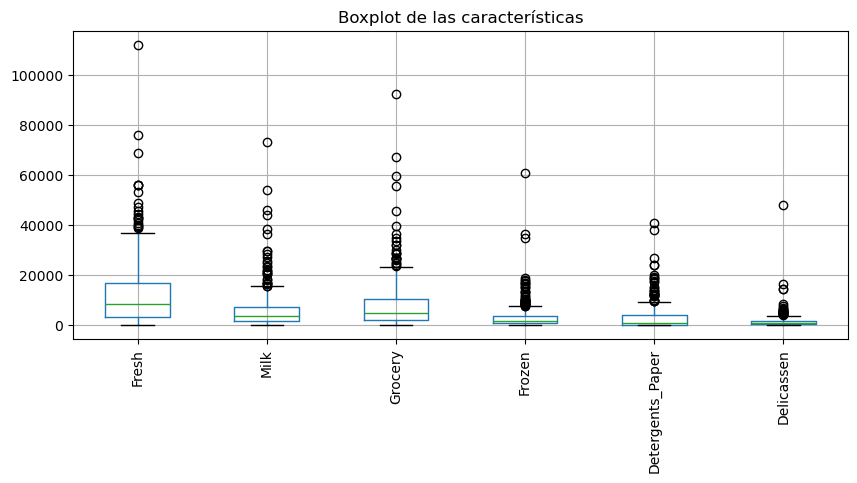

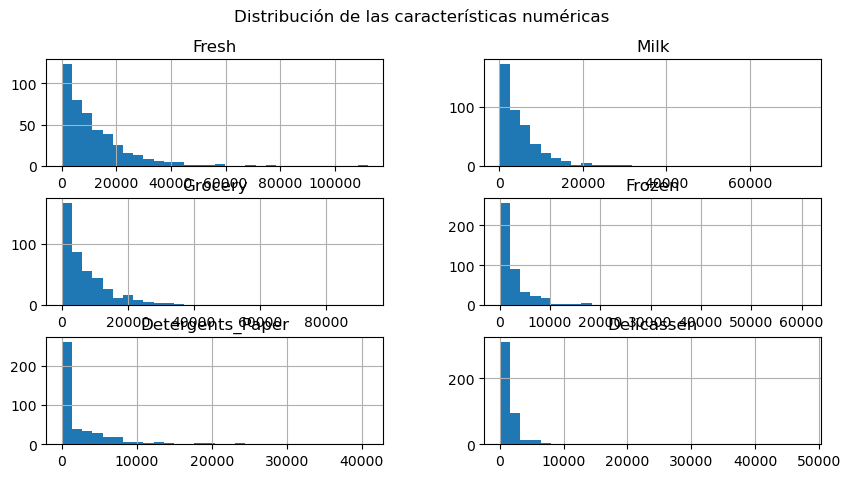

In [15]:

info = data.info()
desc_stats = data.describe()
missing_values = data.isnull().sum()
info, missing_values

print(data.dtypes)

correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

data.boxplot(rot=90, figsize=(10, 4))
plt.title("Boxplot de las características")
plt.show()

data.hist(bins=30, figsize=(10, 5))
plt.suptitle("Distribución de las características numéricas")
plt.show()

**Tus observaciones aquí**

+ Frozen, Grocery, Milk y Detergents Paper tienen una gran correlación positiva entre sí
+ Las distribuciones de gastos en todas las categorías están fuertemente sesgadas hacia la derecha
+ Existen muchos valores atípicos en todas las categorías



# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [29]:
numerical_data = data.select_dtypes(include=[np.number])

Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5


low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR


data_no_outliers = numerical_data[~((numerical_data < (Q1 - threshold * IQR)) | (numerical_data > (Q3 + threshold * IQR))).any(axis=1)]

print(data_no_outliers.head())


   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
3  13265  1196     4221    6404               507        1788
5   9413  8259     5126     666              1795        1451
6  12126  3199     6975     480              3140         545


**Tus observaciones aquí**

+ Los datos han sido limpiados de valores atípicos significativos,
+ los valores en las columnas numéricas parecen razonables y coherentes
+ Dado que la limpieza de valores atípicos se ha llevado a cabo y las transformaciones logarítmicas no se aplicaron

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [32]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(data_no_outliers)
customers_scale_df = pd.DataFrame(customers_scale, columns=data_no_outliers.columns)

customers_scale_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.383041,1.652898,0.334978,-0.967004,0.305053,0.390465
1,-0.305588,1.698756,0.733878,-0.059255,0.569139,0.922591
2,0.456174,-0.866283,-0.328862,2.662821,-0.619462,0.937169
3,-0.016491,1.236906,-0.148989,-0.701951,-0.069958,0.527749
4,0.316411,-0.269838,0.218508,-0.811022,0.503864,-0.572949


# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(customers_scale)
labels = kmeans.labels_

customers_with_labels = data_no_outliers.copy()
customers_with_labels['labels'] = labels
print(customers_with_labels.head())

c:\Users\jessi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jessi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  labels
0  12669  9656     7561     214              2674        1338       0
1   7057  9810     9568    1762              3293        1776       1
3  13265  1196     4221    6404               507        1788       3
5   9413  8259     5126     666              1795        1451       0
6  12126  3199     6975     480              3140         545       2


### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [38]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

c:\Users\jessi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jessi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [39]:
# Your code here:
customers_with_labels = data_no_outliers.copy()
customers_with_labels['Label'] = labels

label_counts = customers_with_labels['Label'].value_counts()
print(label_counts)

Label
0    229
1    103
Name: count, dtype: int64


# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [47]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.5)

dbscan.fit(customers_scale)

labels_dbscan = dbscan.labels_

customers_with_labels = data_no_outliers.copy()
customers_with_labels['labels_DBSCAN'] = labels_dbscan

print(customers_with_labels.head())


   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  labels_DBSCAN
0  12669  9656     7561     214              2674        1338             -1
1   7057  9810     9568    1762              3293        1776             -1
3  13265  1196     4221    6404               507        1788             -1
5   9413  8259     5126     666              1795        1451             -1
6  12126  3199     6975     480              3140         545             -1


Cuenta los valores en `labels_DBSCAN`.

In [41]:
# Your code here
label_counts_dbscan = customers_with_labels['labels_DBSCAN'].value_counts()
print(label_counts_dbscan)

labels_DBSCAN
-1    291
 0     37
 1      4
Name: count, dtype: int64


# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [42]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

In [ ]:
# Your code here:


Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [46]:
# Your code here:
def plot(x, y, hue, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, hue=hue, palette='viridis', legend='full')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Visualización de Grocery como X y Fresh como Y utilizando las etiquetas de K-Means y DBSCAN

# Gráfico para K-Means
plot(customers_with_labels['Grocery'],
     customers_with_labels['Fresh'],
     customers_with_labels['labels'],
     'Grocery vs Fresh (K-Means)')

# Gráfico para DBSCAN
plot(customers_with_labels['Grocery'],
     customers_with_labels['Fresh'],
     customers_with_labels['labels_DBSCAN'],
     'Grocery vs Fresh (DBSCAN)')

KeyError: 'labels'

Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [ ]:
# Your code here:


Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [ ]:
# Your code here:


¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

El rendimiento de los algoritmos...

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
